In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm

In [5]:
N_steps = 3
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

In [6]:
result_loc = "./../../../Server_results/06_01_2021/"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1620834677/"

In [7]:


run_name = "experiment02_06_12_06_35"
q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([-1,N_k,N_steps])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([-1,N_k,N_steps])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([-1,N_k,N_steps])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([-1,N_k,N_steps])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([-1,N_k,N_steps])
p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

In [8]:
q_x.shape

(8, 64, 3)

In [9]:
p.shape

(8, 64)

In [10]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [11]:
def plot_cdf(p,qoi,time_step,epoch):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(QOI[index],np.cumsum(P))


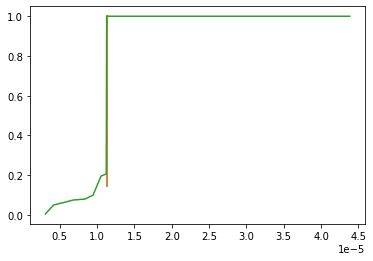

In [12]:
plot_cdf(p,q_x,2,1)
plot_cdf(p,q_x,2,2)
plot_cdf(p,q_x,2,7)
# plot_cdf(p,q_x,2,11)
# plot_cdf(p,q_x,2,13)

# plot_cdf(p,q_x,0,7)

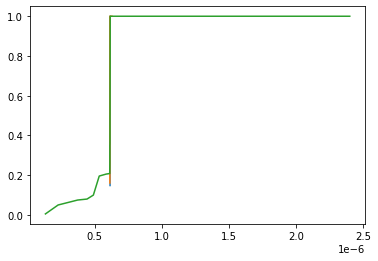

In [13]:
plot_cdf(p,q_y,2,1)
plot_cdf(p,q_y,2,3)
plot_cdf(p,q_y,2,7)
# plot_cdf(p,q_y,2,11)

# plot_cdf(p,q_y,0,5)
# plot_cdf(p,q_y,0,6)
# plot_cdf(p,q_y,0,7)

In [14]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [15]:
q_MC_x.shape

(100, 1800)

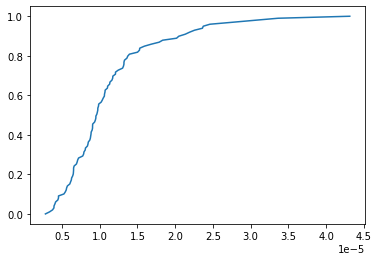

In [16]:
Q_MC = q_MC_x[:,1256]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

# Q_MC = q_MC_x[0,0]

# index_MC = np.argsort(Q_MC)
# plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

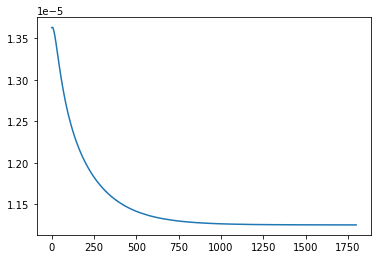

In [17]:
plt.plot(q_MC_x.mean(axis=0))

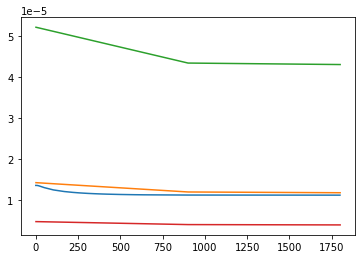

In [18]:

epoch = 6

plt.plot(q_MC_x.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

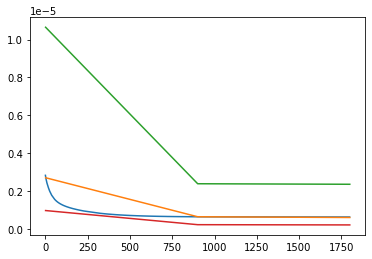

In [19]:
epoch = 6

plt.plot(q_MC_y.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))